In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset

In [2]:
dataA = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/A.csv')
dataB = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/B.csv')
dataC = pd.read_csv('https://raw.githubusercontent.com/azizpandoyo/UAS-AI/main/C.csv')

In [3]:
dataA.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB          GR  NPHI  \
0  734.419199  12.787381   NaN  1.407795  1.472684   NaN  118.992989   NaN   
1  734.571200  12.790987   NaN  1.394810  1.464091   NaN  124.514305   NaN   
2  734.723199  12.801331   NaN  1.377496  1.434632   NaN  126.779854   NaN   
3  734.875200  12.628396   NaN  1.369218  1.419665   NaN  127.186066   NaN   
4  735.027200  12.528492   NaN  1.373198  1.427742   NaN  125.184708   NaN   

   PEF         DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  154.404816 NaN  9.875  26.911829   NaN       1  
1  NaN  154.974701 NaN  9.875  26.133530   NaN       1  
2  NaN  155.762970 NaN  9.875  27.482636   NaN       1  
3  NaN  156.187897 NaN  9.875  28.694523   NaN       1  
4  NaN  157.038986 NaN  9.875  28.981676   NaN       1

In [4]:
dataB.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB         GR      NPHI  \
0  684.270396  13.042573   NaN  1.414800  1.419300   NaN  88.937462  0.455408   
1  684.422396  13.333869   NaN  1.392074  1.398481   NaN  87.800705  0.450693   
2  684.574396  13.426064   NaN  1.435466  1.449827   NaN  86.460014  0.450432   
3  684.726396  13.320748   NaN  1.458956  1.479819   NaN  85.662811  0.461263   
4  684.878396  13.156784   NaN  1.394103  1.403053   NaN  86.043411  0.464723   

   PEF         DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  159.805603 NaN  9.875  39.320923   NaN       1  
1  NaN  158.900360 NaN  9.875  33.086723   NaN       1  
2  NaN  156.982590 NaN  9.875  28.410923   NaN       1  
3  NaN  155.278259 NaN  9.875  19.690228   NaN       1  
4  NaN  155.096039 NaN  9.875  15.122011   NaN       1

In [5]:
dataC.head()

DEPTH_MD       CALI  RSHA      RMED      RDEP  RHOB         GR      NPHI  \
0  735.186799  13.305768   NaN  1.173534  1.168746   NaN  95.069916  0.106903   
1  735.338799  13.382214   NaN  1.173070  1.168229   NaN  93.822601  0.108549   
2  735.490799  13.448009   NaN  1.166865  1.160968   NaN  92.680122  0.114742   
3  735.642799  13.309155   NaN  1.158761  1.150311   NaN  93.568855  0.120261   
4  735.794799  13.254792   NaN  1.157357  1.146551   NaN  95.206711  0.124738   

   PEF  DTC  SP     BS        ROP  DRHO  FACIES  
0  NaN  NaN NaN  9.875  28.763554   NaN       1  
1  NaN  NaN NaN  9.875  28.810400   NaN       1  
2  NaN  NaN NaN  9.875  28.997326   NaN       1  
3  NaN  NaN NaN  9.875  29.191469   NaN       1  
4  NaN  NaN NaN  9.875  29.253410   NaN       1

# Exploratory Data Analysis

## Data Understanding & Preprocessing

#### Provide a New Column Labeled with the Well Name (for Each Data)

In [7]:
dataA.loc[dataA["FACIES"].notnull().values, "WELL_NAME"] = "WELL A"
dataA.to_csv('newdataA.csv')
A = pd.read_csv('newdataA.csv')
dataB.loc[dataB["FACIES"].notnull().values, "WELL_NAME"] = "WELL B"
dataB.to_csv('newdataB.csv')
B = pd.read_csv('newdataB.csv')
dataC.loc[dataC["FACIES"].notnull().values, "WELL_NAME"] = "WELL C"
dataC.to_csv('newdataC.csv')
C = pd.read_csv('newdataC.csv')

#### Merge the Three Data into One Dataset

In [8]:
csv_files = ['newdataA.csv', 'newdataB.csv', 'newdataC.csv']
dataABC = pd.concat([pd.read_csv(f, index_col=0) for f in csv_files], ignore_index=True)
dataABC

DEPTH_MD       CALI  RSHA      RMED      RDEP      RHOB          GR  \
0       734.419199  12.787381   NaN  1.407795  1.472684       NaN  118.992989   
1       734.571200  12.790987   NaN  1.394810  1.464091       NaN  124.514305   
2       734.723199  12.801331   NaN  1.377496  1.434632       NaN  126.779854   
3       734.875200  12.628396   NaN  1.369218  1.419665       NaN  127.186066   
4       735.027200  12.528492   NaN  1.373198  1.427742       NaN  125.184708   
...            ...        ...   ...       ...       ...       ...         ...   
29866  2123.402799   8.465826   NaN  1.508918  1.399308  2.560775   29.390390   
29867  2123.554799   8.461417   NaN  1.714523  1.421449  2.553309   21.255514   
29868  2123.706799   8.473491   NaN  1.770941  1.414646  2.515362   19.803230   
29869  2123.858799   8.459172   NaN  2.338948  2.335207  2.499653   19.054888   
29870  2124.010799   8.468336   NaN  2.113045  2.466919  2.506594   18.742863   

       NPHI       PEF         DTC  SP     BS        ROP      DRHO  FACIES  \
0       NaN       NaN  154.404816 NaN  9.875  26.911829       NaN       1   
1       NaN       NaN  154.974701 NaN  9.875  26.133530       NaN       1   
2       NaN       NaN  155.762970 NaN  9.875  27.482636       NaN       1   
3       NaN       NaN  156.187897 NaN  9.875  28.694523       NaN       1   
4       NaN       NaN  157.038986 NaN  9.875  28.981676       NaN       1   
...     ...       ...         ...  ..    ...        ...       ...     ...   
29866   NaN  4.527966         NaN NaN  8.500  14.614906  0.082481       8   
29867   NaN  4.415823         NaN NaN  8.500  13.537938  0.078607       8   
29868   NaN  4.339602         NaN NaN  8.500  11.451546  0.067462       8   
29869   NaN  4.305042         NaN NaN  8.500  11.103429  0.065294       8   
29870   NaN  4.430252         NaN NaN  8.500  10.875896  0.068734       8   

      WELL_NAME  
0        WELL A  
1        WELL A  
2        WELL A  
3        WELL A  
4        WELL A  
...         ...  
29866    WELL C  
29867    WELL C  
29868    WELL C  
29869    WELL C  
29870    WELL C  

[29871 rows x 16 columns]

In [9]:
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  29871.000000  29701.000000   0.0  29810.000000  29862.000000   
mean    1477.632928     11.761533   NaN      2.090305      2.261846   
std      442.818362      1.607150   NaN     14.986359     16.000113   
min      684.270396      7.886668   NaN      0.323498      0.318176   
25%     1096.260798     12.258815   NaN      0.844643      0.879092   
50%     1474.659200     12.416596   NaN      1.168165      1.213086   
75%     1852.991000     12.563520   NaN      1.582224      1.643712   
max     2361.883200     17.688429   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28902.000000  29871.000000  29384.000000  28902.000000  29477.000000   
mean       2.198956     80.967951      0.373683      4.185141    124.158746   
std        0.175694     36.150132      0.123706      1.402850     26.750434   
min        1.556648      6.510116      0.003064      1.658541     48.621746   
25%        2.071743     53.016529      0.271813      3.305484    101.170441   
50%        2.158131     85.741882      0.406890      3.836642    136.910248   
75%        2.352444    105.693970      0.469338      4.829510    144.459579   
max        2.789680    726.266113      0.768312     29.109318    177.843659   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  29871.000000  29848.000000  29232.000000  29871.000000  
mean   NaN     11.477007     25.597866      0.007022      2.324897  
std    NaN      1.503031     13.741399      0.034622      1.775686  
min    NaN      8.500000      0.703106     -0.115128      1.000000  
25%    NaN     12.250001     16.146353     -0.010219      1.000000  
50%    NaN     12.250001     25.099759     -0.002041      1.000000  
75%    NaN     12.250001     33.263824      0.009434      4.000000  
max    NaN     12.250001    299.693603      0.436384      8.000000

In [10]:
dataABC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29871 entries, 0 to 29870
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPTH_MD   29871 non-null  float64
 1   CALI       29701 non-null  float64
 2   RSHA       0 non-null      float64
 3   RMED       29810 non-null  float64
 4   RDEP       29862 non-null  float64
 5   RHOB       28902 non-null  float64
 6   GR         29871 non-null  float64
 7   NPHI       29384 non-null  float64
 8   PEF        28902 non-null  float64
 9   DTC        29477 non-null  float64
 10  SP         0 non-null      float64
 11  BS         29871 non-null  float64
 12  ROP        29848 non-null  float64
 13  DRHO       29232 non-null  float64
 14  FACIES     29871 non-null  int64  
 15  WELL_NAME  29871 non-null  object 
dtypes: float64(14), int64(1), object(1)
memory usage: 3.6+ MB


#### Remove Data Points That Don't Have A Valid 'CALI' Entry

In [11]:
CALI_mask = dataABC['CALI'].notnull().values
dataABC = dataABC[CALI_mask]
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  29701.000000  29701.000000   0.0  29640.000000  29692.000000   
mean    1476.048391     11.761533   NaN      2.090308      2.262445   
std      443.367466      1.607150   NaN     15.029198     16.045803   
min      684.270396      7.886668   NaN      0.323498      0.318176   
25%     1094.507200     12.258815   NaN      0.842729      0.877037   
50%     1470.707200     12.416596   NaN      1.164934      1.210011   
75%     1855.122799     12.563520   NaN      1.575004      1.632562   
max     2361.883200     17.688429   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28895.000000  29701.000000  29377.000000  28895.000000  29307.000000   
mean       2.198996     81.185544      0.373683      4.185477    124.311633   
std        0.175697     36.133017      0.123721      1.402842     26.738891   
min        1.556648      6.510116      0.003064      1.658541     48.621746   
25%        2.071805     53.353378      0.271778      3.305975    101.902519   
50%        2.158145     86.032036      0.406928      3.836888    137.016769   
75%        2.352460    105.859100      0.469354      4.829690    144.497528   
max        2.789680    726.266113      0.768312     29.109318    177.843659   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  29701.000000  29678.000000  29215.000000  29701.000000  
mean   NaN     11.472582     25.621858      0.006913      2.311404  
std    NaN      1.506185     13.770136      0.034034      1.769769  
min    NaN      8.500000      0.703106     -0.115128      1.000000  
25%    NaN     12.250001     16.142936     -0.010220      1.000000  
50%    NaN     12.250001     25.133488     -0.002045      1.000000  
75%    NaN     12.250001     33.300817      0.009422      4.000000  
max    NaN     12.250001    299.693603      0.433157      8.000000

#### Remove Data Points That Don't Have A Valid 'RMED' Entry

In [12]:
RMED_mask = dataABC['RMED'].notnull().values
dataABC = dataABC[RMED_mask]
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  29640.000000  29640.000000   0.0  29640.000000  29640.000000   
mean    1474.902198     11.767265   NaN      2.090308      2.264378   
std      443.033805      1.603681   NaN     15.029198     16.059805   
min      684.270396      7.886668   NaN      0.323498      0.318176   
25%     1093.711999     12.260857   NaN      0.842729      0.876611   
50%     1469.116798     12.417108   NaN      1.164934      1.210067   
75%     1852.837100     12.563934   NaN      1.575004      1.633899   
max     2360.515200     17.688429   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28886.000000  29640.000000  29325.000000  28886.000000  29255.000000   
mean       2.198925     81.230538      0.373689      4.185740    124.336108   
std        0.175679     36.149187      0.123824      1.402981     26.755879   
min        1.556648      6.510116      0.003064      1.658541     48.621746   
25%        2.071773     53.385526      0.271516      3.306039    101.837353   
50%        2.158083     86.146637      0.407280      3.837304    137.050125   
75%        2.352376    105.897560      0.469437      4.830592    144.520065   
max        2.789680    726.266113      0.768312     29.109318    177.843659   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  29640.000000  29617.000000  29197.000000  29640.000000  
mean   NaN     11.472121     25.639921      0.006883      2.304723  
std    NaN      1.506492     13.766688      0.033933      1.764786  
min    NaN      8.500000      0.717965     -0.115128      1.000000  
25%    NaN     12.250001     16.163443     -0.010222      1.000000  
50%    NaN     12.250001     25.145004     -0.002047      1.000000  
75%    NaN     12.250001     33.304874      0.009413      4.000000  
max    NaN     12.250001    299.693603      0.323870      8.000000

#### Remove Data Points That Don't Have A Valid 'RHOB' Entry

In [13]:
RHOB_mask = dataABC['RHOB'].notnull().values
dataABC = dataABC[RHOB_mask]
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  28886.000000  28886.000000   0.0  28886.000000  28886.000000   
mean    1478.433332     11.750402   NaN      2.113526      2.291317   
std      437.052308      1.587360   NaN     15.223341     16.267120   
min      705.550396      7.886668   NaN      0.323498      0.318176   
25%     1103.065597     12.266634   NaN      0.835839      0.870922   
50%     1468.964798     12.416849   NaN      1.163084      1.209511   
75%     1846.152899     12.558490   NaN      1.587260      1.649968   
max     2360.515200     15.132005   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28886.000000  28886.000000  28811.000000  28886.000000  28557.000000   
mean       2.198925     80.909889      0.373755      4.185740    124.150542   
std        0.175679     36.363885      0.123980      1.402981     26.823115   
min        1.556648      6.510116      0.003064      1.658541     48.621746   
25%        2.071773     52.832675      0.270792      3.306039    100.614464   
50%        2.158083     85.969357      0.408198      3.837304    137.093597   
75%        2.352376    105.672783      0.469831      4.830592    144.417068   
max        2.789680    726.266113      0.768312     29.109318    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  28886.000000  28863.000000  28886.000000  28886.000000  
mean   NaN     11.483874     25.658479      0.006483      2.273350  
std    NaN      1.511341     13.859752      0.032257      1.730617  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     16.147400     -0.010187      1.000000  
50%    NaN     12.250001     25.142681     -0.002081      1.000000  
75%    NaN     12.250001     33.383417      0.009242      4.000000  
max    NaN     12.250001    299.693603      0.267929      8.000000

#### Remove Data Points That Don't Have A Valid 'NPHI' Entry

In [14]:
NPHI_mask = dataABC['NPHI'].notnull().values
dataABC = dataABC[NPHI_mask]
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  28811.000000  28811.000000   0.0  28811.000000  28811.000000   
mean    1477.186717     11.754941   NaN      2.113272      2.291604   
std      436.831955      1.584040   NaN     15.242920     16.288088   
min      705.550396      7.886668   NaN      0.323498      0.318176   
25%     1102.116597     12.267807   NaN      0.835179      0.870149   
50%     1467.066799     12.416996   NaN      1.162318      1.208994   
75%     1845.466999     12.559080   NaN      1.585400      1.647971   
max     2359.907200     15.132005   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28811.000000  28811.000000  28811.000000  28811.000000  28510.000000   
mean       2.198358     80.950427      0.373755      4.183597    124.170309   
std        0.175498     36.366382      0.123980      1.402327     26.835342   
min        1.556648      6.510116      0.003064      1.658541     48.621746   
25%        2.071540     52.872053      0.270792      3.304870    100.643768   
50%        2.157509     86.091217      0.408198      3.836053    137.115410   
75%        2.351784    105.700561      0.469831      4.826178    144.429890   
max        2.789680    726.266113      0.768312     29.109318    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  28811.000000  28788.000000  28811.000000  28811.000000  
mean   NaN     11.488127     25.693309      0.006318      2.266391  
std    NaN      1.508210     13.856786      0.031969      1.724464  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     16.229355     -0.010213      1.000000  
50%    NaN     12.250001     25.171993     -0.002100      1.000000  
75%    NaN     12.250001     33.406818      0.009189      4.000000  
max    NaN     12.250001    299.693603      0.267929      8.000000

#### Remove Data Points That Don't Have A Valid 'DTC' Entry

In [15]:
DTC_mask = dataABC['DTC'].notnull().values
dataABC = dataABC[DTC_mask]
dataABC.describe()

DEPTH_MD          CALI  RSHA          RMED          RDEP  \
count  28510.000000  28510.000000   0.0  28510.000000  28510.000000   
mean    1470.457826     11.787606   NaN      2.102438      2.283264   
std      433.897842      1.559542   NaN     15.314634     16.367093   
min      705.550396      7.886668   NaN      0.323498      0.318176   
25%     1098.315698     12.276067   NaN      0.832489      0.866599   
50%     1459.463000     12.419131   NaN      1.158138      1.205911   
75%     1833.080899     12.561033   NaN      1.577049      1.635132   
max     2352.003200     15.132005   NaN   1366.792481   1596.285523   

               RHOB            GR          NPHI           PEF           DTC  \
count  28510.000000  28510.000000  28510.000000  28510.000000  28510.000000   
mean       2.196964     80.642626      0.374892      4.156473    124.170309   
std        0.173692     35.132540      0.123255      1.210248     26.835342   
min        1.693096      6.510116      0.003064      1.658541     48.621746   
25%        2.071162     52.866370      0.273192      3.302136    100.643768   
50%        2.156671     86.077541      0.409522      3.833397    137.115410   
75%        2.349986    105.431972      0.470055      4.818190    144.429890   
max        2.789680    268.161072      0.768312     22.226114    169.838211   

        SP            BS           ROP          DRHO        FACIES  
count  0.0  28510.000000  28487.000000  28510.000000  28510.000000  
mean   NaN     11.519675     25.768458      0.005565      2.262399  
std    NaN      1.484401     13.885295      0.030938      1.720377  
min    NaN      8.500000      0.836583     -0.107703      1.000000  
25%    NaN     12.250001     16.305968     -0.010288      1.000000  
50%    NaN     12.250001     25.293894     -0.002306      1.000000  
75%    NaN     12.250001     33.506008      0.008745      4.000000  
max    NaN     12.250001    299.693603      0.267929      8.000000

#### Remove Features That Are Not Needed

The determination of unnecessary data is based on the scientific domain of Well Logging. So the features that will be used in the training process are all data, except for **'BS', 'ROP', dan 'DRHO'**, because they do not significantly affect the prediction of facies classification. While the data **'RSHA' and 'SP'**, both have no value (NaN).

In [16]:
dataABC.drop(labels=['RSHA', 'SP', 'BS', 'ROP', 'DRHO'], axis=1, inplace=True)
dataABC

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
130     754.179199  12.521476  1.412026  1.315972  2.079341  115.562035   
131     754.331200  12.630612  1.398117  1.315344  2.077192  113.619270   
132     754.483199  12.726549  1.394453  1.323453  2.076251  116.701439   
133     754.635199  12.860774  1.415387  1.336856  2.078405  118.532913   
134     754.787200  12.904781  1.389204  1.309308  2.079669  119.113991   
...            ...        ...       ...       ...       ...         ...   
29770  2108.810799   8.489223  2.515090  2.351785  2.578479   41.485081   
29771  2108.962799   8.495117  2.285108  2.113054  2.577482   40.776936   
29772  2109.114799   8.501101  2.294918  2.168718  2.576595   41.308838   
29773  2109.266799   8.487657  2.214566  2.173669  2.582330   41.449379   
29774  2109.418799   8.468590  2.096360  2.026962  2.584394   40.251076   

           NPHI       PEF         DTC  FACIES WELL_NAME  
130    0.495291  5.906584  143.338440       1    WELL A  
131    0.501820  6.384551  143.411118       1    WELL A  
132    0.522005  7.069182  143.314133       1    WELL A  
133    0.546147  7.836967  143.667496       1    WELL A  
134    0.558983  7.969746  145.145447       1    WELL A  
...         ...       ...         ...     ...       ...  
29770  0.217340  4.738206   65.315865       1    WELL C  
29771  0.228533  4.893716   65.888664       1    WELL C  
29772  0.224942  4.922005   66.780136       1    WELL C  
29773  0.220939  4.987738   67.610382       1    WELL C  
29774  0.208230  4.941102   68.807716       1    WELL C  

[28510 rows x 11 columns]

#### Change into Categorical Data

In [17]:
dataABC['WELL_NAME'] = dataABC['WELL_NAME'].astype('category')
dataABC['WELL_NAME'].unique()
dataABC.dtypes

DEPTH_MD      float64
CALI          float64
RMED          float64
RDEP          float64
RHOB          float64
GR            float64
NPHI          float64
PEF           float64
DTC           float64
FACIES          int64
WELL_NAME    category
dtype: object

#### Remove a Single Well (named WELL C) to Use as Blind Dataset Later

In [18]:
blind_dataset = dataABC[dataABC['WELL_NAME'] == 'WELL C']
training_dataset = dataABC[dataABC['WELL_NAME'] != 'WELL C']
training_dataset['WELL_NAME'].value_counts()

WELL_NAME
WELL A    10331
WELL B     9596
WELL C        0
Name: count, dtype: int64

#### Plot Log Data for Well-A

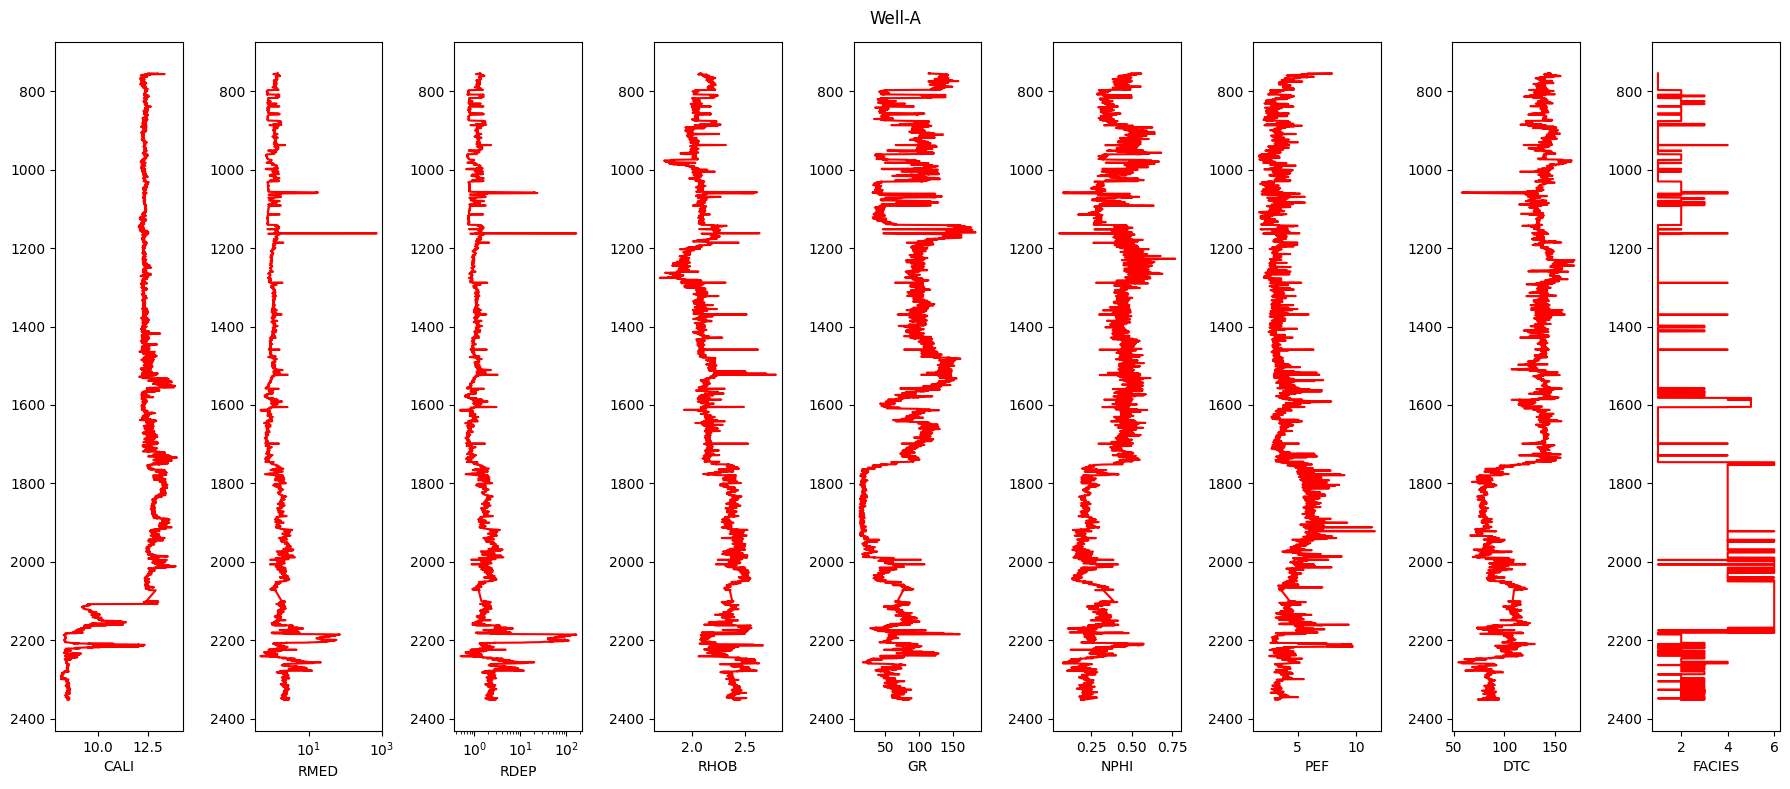

In [19]:
figure, ax = plt.subplots(nrows=1, ncols=9, figsize=(18, 8))
logs = training_dataset[training_dataset['WELL_NAME'] == 'WELL A'].sort_values(by='DEPTH_MD')
features = ['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'FACIES']

for i in range(len(features)):
    if features[i] in ['RMED', 'RDEP']:
        ax[i].semilogx(logs[features[i]], logs.DEPTH_MD, '-r')
    else:
        ax[i].plot(logs[features[i]], logs.DEPTH_MD, '-r')
    ax[i].invert_yaxis()
    ax[i].set_xlabel(features[i])

figure.suptitle('Well-A')
plt.tight_layout()
plt.show()

<Axes: xlabel='FACIES'>

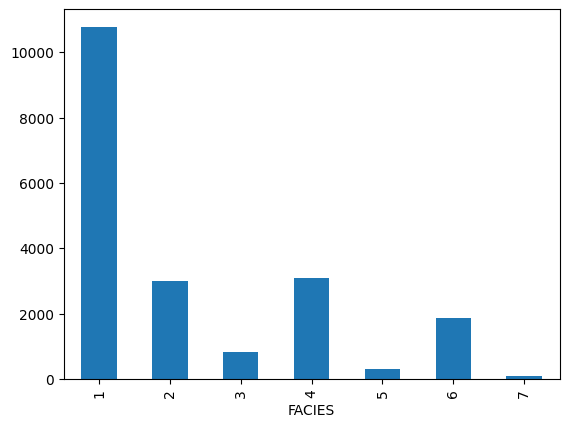

In [20]:
facies_counts = training_dataset['FACIES'].value_counts().sort_index()
facies_counts.plot(kind='bar')

#### Pair Plot for Wireline Data Reading

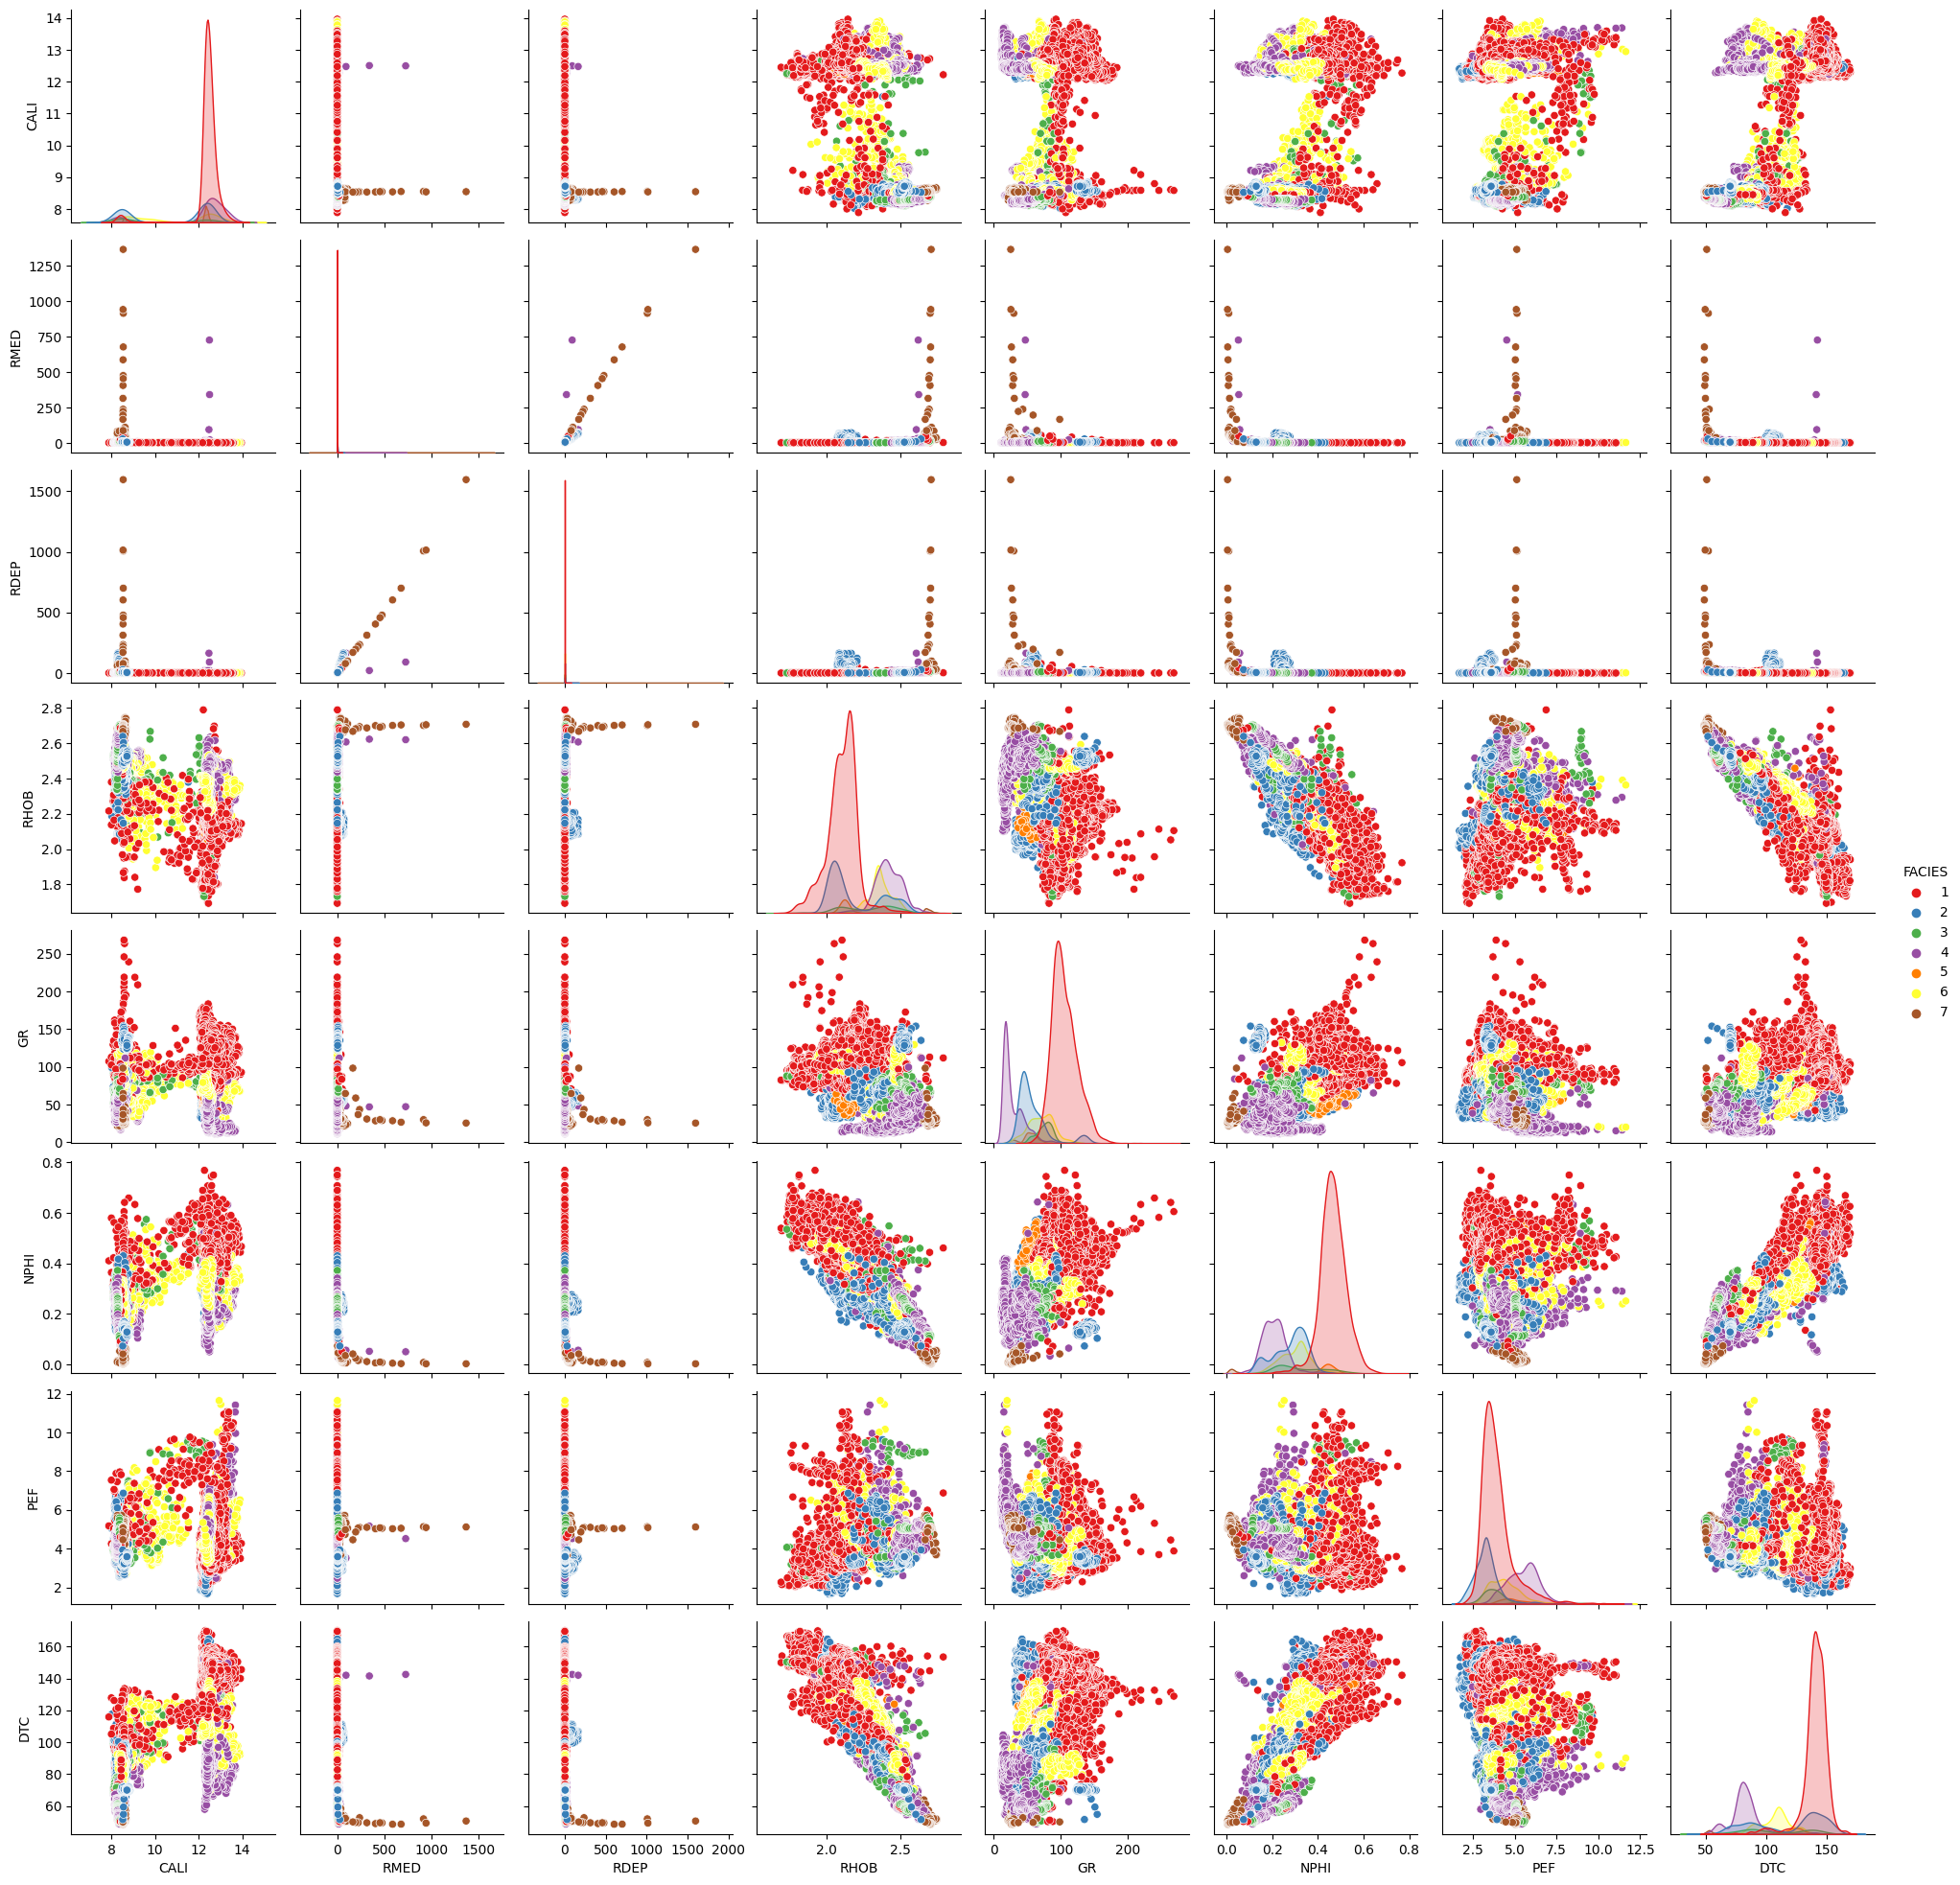

In [25]:
training_dataset.columns
dummy = training_dataset.drop(['DEPTH_MD', 'WELL_NAME'], axis=1)
sns.pairplot(dummy, hue='FACIES', palette='Set1')

In [27]:
training_dataset

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
130     754.179199  12.521476  1.412026  1.315972  2.079341  115.562035   
131     754.331200  12.630612  1.398117  1.315344  2.077192  113.619270   
132     754.483199  12.726549  1.394453  1.323453  2.076251  116.701439   
133     754.635199  12.860774  1.415387  1.336856  2.078405  118.532913   
134     754.787200  12.904781  1.389204  1.309308  2.079669  119.113991   
...            ...        ...       ...       ...       ...         ...   
20654  2196.062396   8.722105  5.016001  4.727455  2.537510  132.450317   
20655  2196.214396   8.701121  4.574865  4.421765  2.526997  131.869812   
20656  2196.366396   8.710958  4.761734  4.535498  2.520570  127.004021   
20657  2196.518396   8.712500  5.035505  4.870131  2.523459  124.698349   
20658  2196.670396   8.714984  5.148253  5.027130  2.527240  128.527740   

           NPHI       PEF         DTC  FACIES WELL_NAME  
130    0.495291  5.906584  143.338440       1    WELL A  
131    0.501820  6.384551  143.411118       1    WELL A  
132    0.522005  7.069182  143.314133       1    WELL A  
133    0.546147  7.836967  143.667496       1    WELL A  
134    0.558983  7.969746  145.145447       1    WELL A  
...         ...       ...         ...     ...       ...  
20654  0.112312  3.663386   70.126060       2    WELL B  
20655  0.116130  3.629687   70.316216       2    WELL B  
20656  0.120230  3.615547   70.462158       2    WELL B  
20657  0.126182  3.594654   70.337593       2    WELL B  
20658  0.128836  3.584660   70.007980       2    WELL B  

[19927 rows x 11 columns]

<Axes: >

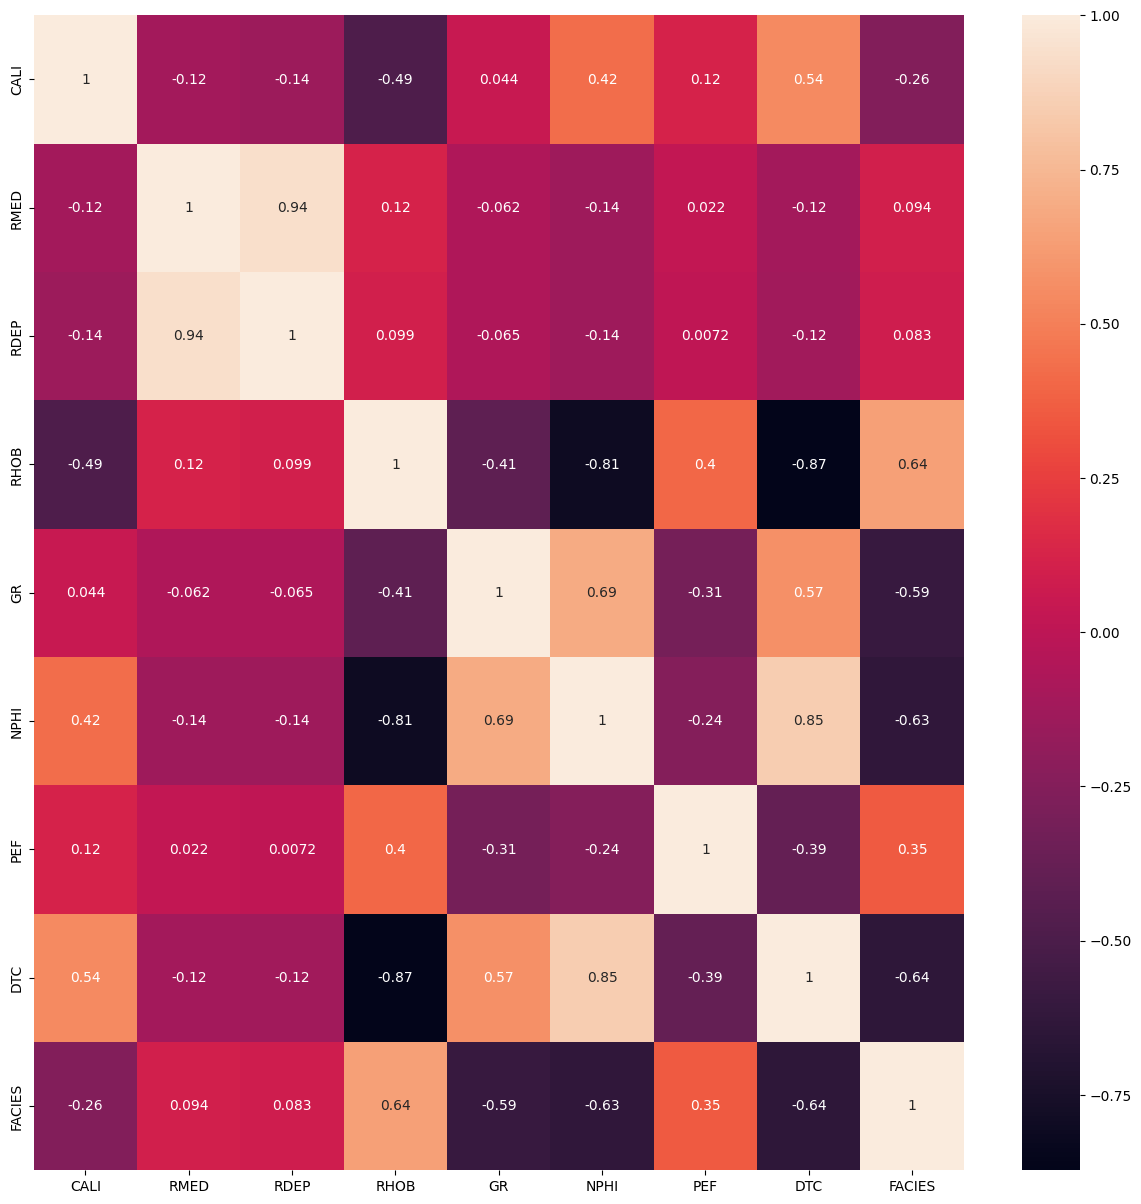

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(dummy.corr(), annot=True)

## Data Conditioning

#### Split into Matrix Feature and Facies Label

In [29]:
X = training_dataset.drop(['DEPTH_MD', 'FACIES', 'WELL_NAME'], axis=1)
y = training_dataset['FACIES']

#### Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Classification

## Training Dataset (Well A & Well B)

There are several types of model approaches used for the classification of these Facies, namely K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Random Forest (RF).

### K-Nearest Neighbors Classification

#### Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_distributions_knn = {'n_neighbors': np.arange(2, 20, 2),
                       'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                           param_distributions_knn,
                           scoring='accuracy', cv=10)
grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [38]:
grid_search_knn.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

#### Model Evaluation on Test Set

In [39]:
knn = grid_search_knn.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

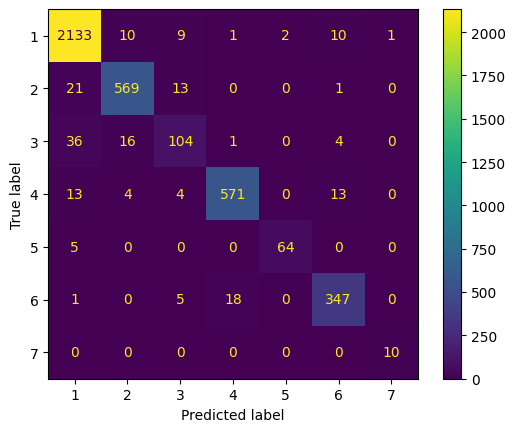

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_).plot()

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           1       0.97      0.98      0.98      2166
           2       0.95      0.94      0.95       604
           3       0.77      0.65      0.70       161
           4       0.97      0.94      0.95       605
           5       0.97      0.93      0.95        69
           6       0.93      0.94      0.93       371
           7       0.91      1.00      0.95        10

    accuracy                           0.95      3986
   macro avg       0.92      0.91      0.92      3986
weighted avg       0.95      0.95      0.95      3986



### Support Vector Machine Classification

#### Hyperparameter Tuning

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_distributions_svm = {'C': [1, 3, 10],
                        'kernel': ('linear', 'rbf'),
                        'gamma' : ('scale', 'auto')}

grid_search_svm = GridSearchCV(SVC(),
                           param_grid=param_distributions_svm,
                           scoring='accuracy',
                           cv=10)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 3, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [43]:
grid_search_svm.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

#### Model Evaluation on Test Set

In [44]:
svm = grid_search_svm.best_estimator_
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

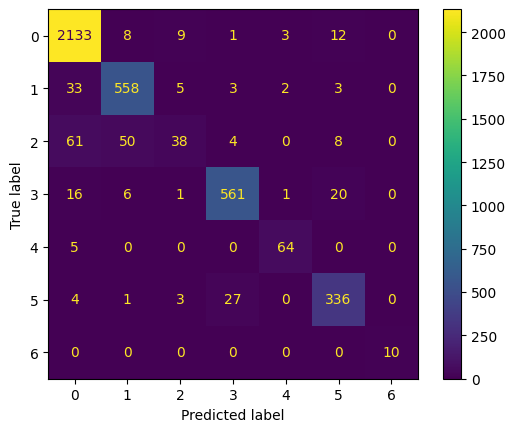

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           1       0.95      0.98      0.97      2166
           2       0.90      0.92      0.91       604
           3       0.68      0.24      0.35       161
           4       0.94      0.93      0.93       605
           5       0.91      0.93      0.92        69
           6       0.89      0.91      0.90       371
           7       1.00      1.00      1.00        10

    accuracy                           0.93      3986
   macro avg       0.89      0.84      0.85      3986
weighted avg       0.92      0.93      0.92      3986



### Random Forest Classification

#### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_distributions_rfc = {'n_estimators': sp_randint(50, 200),
                       'max_depth': sp_randint(3, 7),
                       'max_features': sp_randint(1, 5)}
grid_search_rfc = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions_rfc,
                           scoring='accuracy', cv=10)
grid_search_rfc.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024AB4304250>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024AB435F7D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024AB429E210>},
                   scoring='accuracy')

In [48]:
grid_search_rfc.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 72}

#### Model Evaluation on Test Set

In [49]:
rfc = grid_search_rfc.best_estimator_
rfc.fit(X_train_scaled, y_train)
y_pred_rfc = rfc.predict(X_test_scaled)

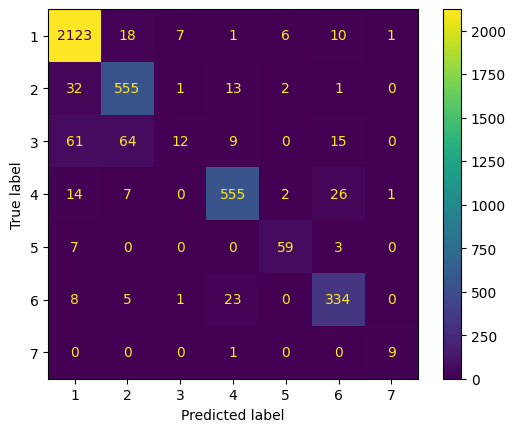

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_rfc = confusion_matrix(y_test, y_pred_rfc)
ConfusionMatrixDisplay(confusion_matrix=cm_rfc, display_labels=rfc.classes_).plot()

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           1       0.95      0.98      0.96      2166
           2       0.86      0.92      0.89       604
           3       0.57      0.07      0.13       161
           4       0.92      0.92      0.92       605
           5       0.86      0.86      0.86        69
           6       0.86      0.90      0.88       371
           7       0.82      0.90      0.86        10

    accuracy                           0.91      3986
   macro avg       0.83      0.79      0.78      3986
weighted avg       0.90      0.91      0.90      3986



### Table 1 - Create Dataframe of Model Evaluation

In [52]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

r2_knn = r2_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
r2_svm = r2_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
r2_rfc = r2_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')


In [53]:
combine ={'Model Type': ['KNN', 'SVM', 'RFC'],
       'R2-Score': [r2_knn, r2_svm, r2_rfc],
       'F1-Score': [f1_knn, f1_svm, f1_rfc]
            }
table1 = pd.DataFrame(combine, columns = ['Model Type','R2-Score','F1-Score' ])
table1.round(2)

Model Type  R2-Score  F1-Score
0        KNN      0.91      0.95
1        SVM      0.87      0.92
2        RFC      0.84      0.90

## Blind Dataset (Well-C)

In [54]:
y_blind = blind_dataset['FACIES']
X_blind = blind_dataset.drop(['DEPTH_MD', 'FACIES', 'WELL_NAME'], axis=1)
X_blind_scaled = scaler.transform(X_blind)

y_blind_knn = knn.predict(X_blind_scaled)
y_blind_svm = svm.predict(X_blind_scaled)
y_blind_rfc = rfc.predict(X_blind_scaled)

### K-Nearest Neighbors Classification - Blind Dataset

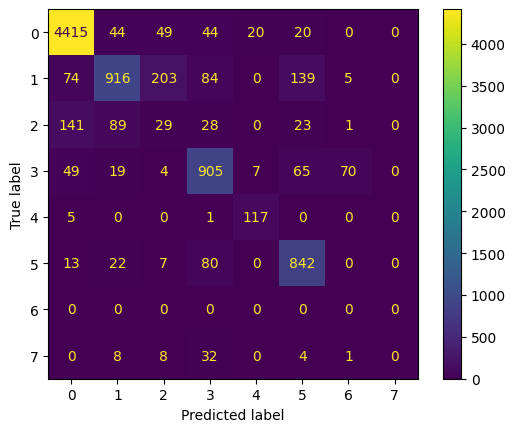

In [55]:
cm_knn_blind = confusion_matrix(y_blind, y_blind_knn)
ConfusionMatrixDisplay(cm_knn_blind).plot()

In [56]:
print(classification_report(y_blind, y_blind_knn))

              precision    recall  f1-score   support

           1       0.94      0.96      0.95      4592
           2       0.83      0.64      0.73      1421
           3       0.10      0.09      0.09       311
           4       0.77      0.81      0.79      1119
           5       0.81      0.95      0.88       123
           6       0.77      0.87      0.82       964
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        53

    accuracy                           0.84      8583
   macro avg       0.53      0.54      0.53      8583
weighted avg       0.84      0.84      0.84      8583



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

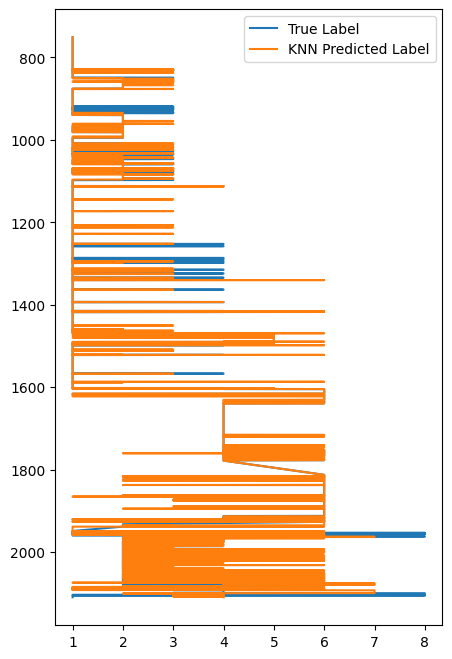

In [57]:
figure, ax = plt.subplots(figsize=(5,8))
logs = blind_dataset.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_knn, logs.DEPTH_MD, label='KNN Predicted Label')
ax.invert_yaxis()
ax.legend()

### Support Machine Vector Classification - Blind Dataset

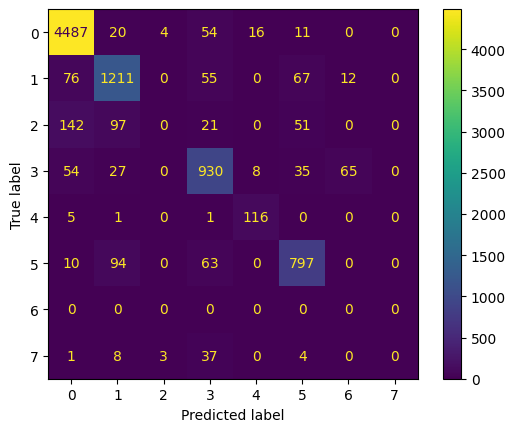

In [58]:
cm_svm_blind = confusion_matrix(y_blind, y_blind_svm)
ConfusionMatrixDisplay(cm_svm_blind).plot()

In [59]:
print(classification_report(y_blind, y_blind_svm))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96      4592
           2       0.83      0.85      0.84      1421
           3       0.00      0.00      0.00       311
           4       0.80      0.83      0.82      1119
           5       0.83      0.94      0.88       123
           6       0.83      0.83      0.83       964
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        53

    accuracy                           0.88      8583
   macro avg       0.53      0.55      0.54      8583
weighted avg       0.85      0.88      0.86      8583



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

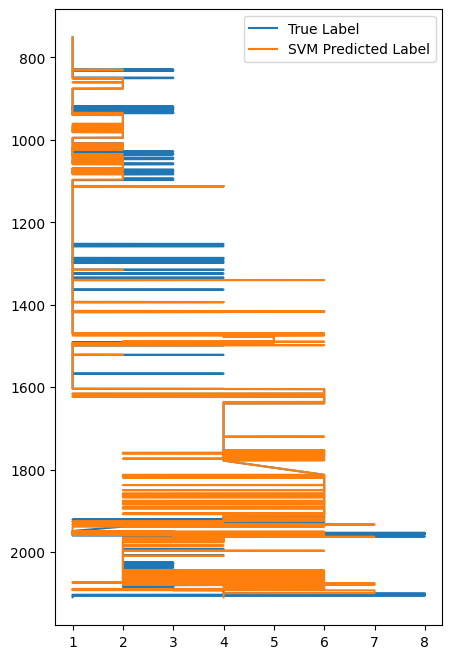

In [60]:
figure, ax = plt.subplots(figsize=(5,8))
logs = blind_dataset.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_svm, logs.DEPTH_MD, label='SVM Predicted Label')
ax.invert_yaxis()
ax.legend()

### Random Forest Classification - Blind Dataset

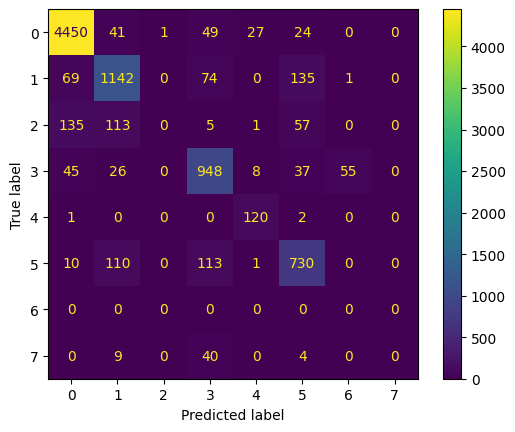

In [61]:
cm_rfc_blind = confusion_matrix(y_blind, y_blind_rfc)
ConfusionMatrixDisplay(cm_rfc_blind).plot()

In [62]:
print(classification_report(y_blind, y_blind_rfc))

              precision    recall  f1-score   support

           1       0.94      0.97      0.96      4592
           2       0.79      0.80      0.80      1421
           3       0.00      0.00      0.00       311
           4       0.77      0.85      0.81      1119
           5       0.76      0.98      0.86       123
           6       0.74      0.76      0.75       964
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00        53

    accuracy                           0.86      8583
   macro avg       0.50      0.54      0.52      8583
weighted avg       0.83      0.86      0.85      8583



c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

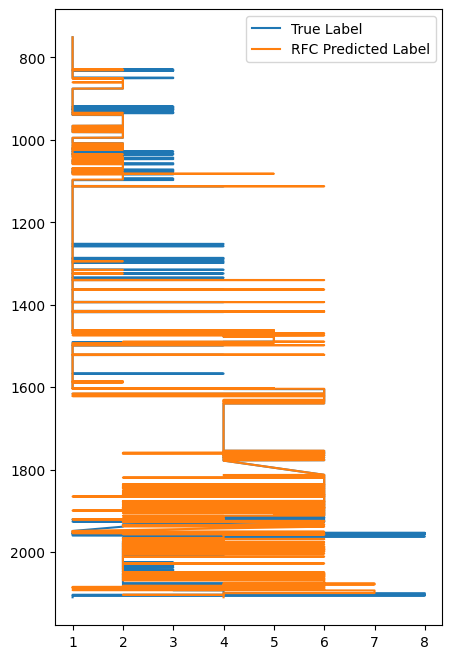

In [63]:
figure, ax = plt.subplots(figsize=(5,8))
logs = blind_dataset.sort_values(by='DEPTH_MD')
ax.plot(logs.FACIES, logs.DEPTH_MD, label='True Label')
ax.plot(y_blind_rfc, logs.DEPTH_MD, label='RFC Predicted Label')
ax.invert_yaxis()
ax.legend()

### Table 2 - Create Dataframe of Blind Evaluation

In [64]:
r2_knn_blind = r2_score(y_blind, y_blind_knn)
f1_knn_blind = f1_score(y_blind, y_blind_knn, average='weighted')
r2_svm_blind = r2_score(y_blind, y_blind_svm)
f1_svm_blind = f1_score(y_blind, y_blind_svm, average='weighted')
r2_rfc_blind = r2_score(y_blind, y_blind_rfc)
f1_rfc_blind = f1_score(y_blind, y_blind_rfc, average='weighted')


In [65]:
combine2 ={'Model Type': ['KNN', 'SVM', 'RFC'],
       'R2-Score': [r2_knn_blind, r2_svm_blind, r2_rfc_blind],
       'F1-Score': [f1_knn_blind, f1_svm_blind, f1_rfc_blind]
            }
table2 = pd.DataFrame(combine2, columns = ['Model Type','R2-Score','F1-Score' ])
table2.round(2)

Model Type  R2-Score  F1-Score
0        KNN      0.67      0.84
1        SVM      0.69      0.86
2        RFC      0.64      0.85

## Compare Facies Log Plot Prediction

In [69]:
blind_dataset2 = pd.DataFrame((blind_dataset), columns=blind_dataset.columns)
blind_dataset2['KNN PREDICT']=y_blind_knn
blind_dataset2['SVM PREDICT']=y_blind_svm
blind_dataset2['RFC PREDICT']=y_blind_rfc
blind_dataset2

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
20837   750.994799  12.515306  1.404218  1.819757  2.161265  132.454163   
20838   751.146799  12.604114  1.548213  2.238864  2.155790  133.652435   
20839   751.298799  12.714417  1.486545  2.139487  2.138880  135.580185   
20840   751.450799  12.919146  1.622281  1.934607  2.126831  136.829163   
20841   751.602799  13.266032  1.716296  2.121501  2.120161  136.197342   
...            ...        ...       ...       ...       ...         ...   
29770  2108.810799   8.489223  2.515090  2.351785  2.578479   41.485081   
29771  2108.962799   8.495117  2.285108  2.113054  2.577482   40.776936   
29772  2109.114799   8.501101  2.294918  2.168718  2.576595   41.308838   
29773  2109.266799   8.487657  2.214566  2.173669  2.582330   41.449379   
29774  2109.418799   8.468590  2.096360  2.026962  2.584394   40.251076   

           NPHI       PEF         DTC  FACIES WELL_NAME  KNN PREDICT  \
20837  0.462371  3.290956  142.222961       1    WELL C            1   
20838  0.423891  3.478236  142.417725       1    WELL C            1   
20839  0.402092  3.735251  142.762161       1    WELL C            1   
20840  0.406975  4.189291  142.574905       1    WELL C            1   
20841  0.435548  4.938508  141.358948       1    WELL C            1   
...         ...       ...         ...     ...       ...          ...   
29770  0.217340  4.738206   65.315865       1    WELL C            4   
29771  0.228533  4.893716   65.888664       1    WELL C            4   
29772  0.224942  4.922005   66.780136       1    WELL C            4   
29773  0.220939  4.987738   67.610382       1    WELL C            4   
29774  0.208230  4.941102   68.807716       1    WELL C            4   

       SVM PREDICT  RFC PREDICT  
20837            1            1  
20838            1            1  
20839            1            1  
20840            1            1  
20841            1            1  
...            ...          ...  
29770            4            4  
29771            4            4  
29772            4            4  
29773            4            4  
29774            4            4  

[8583 rows x 14 columns]

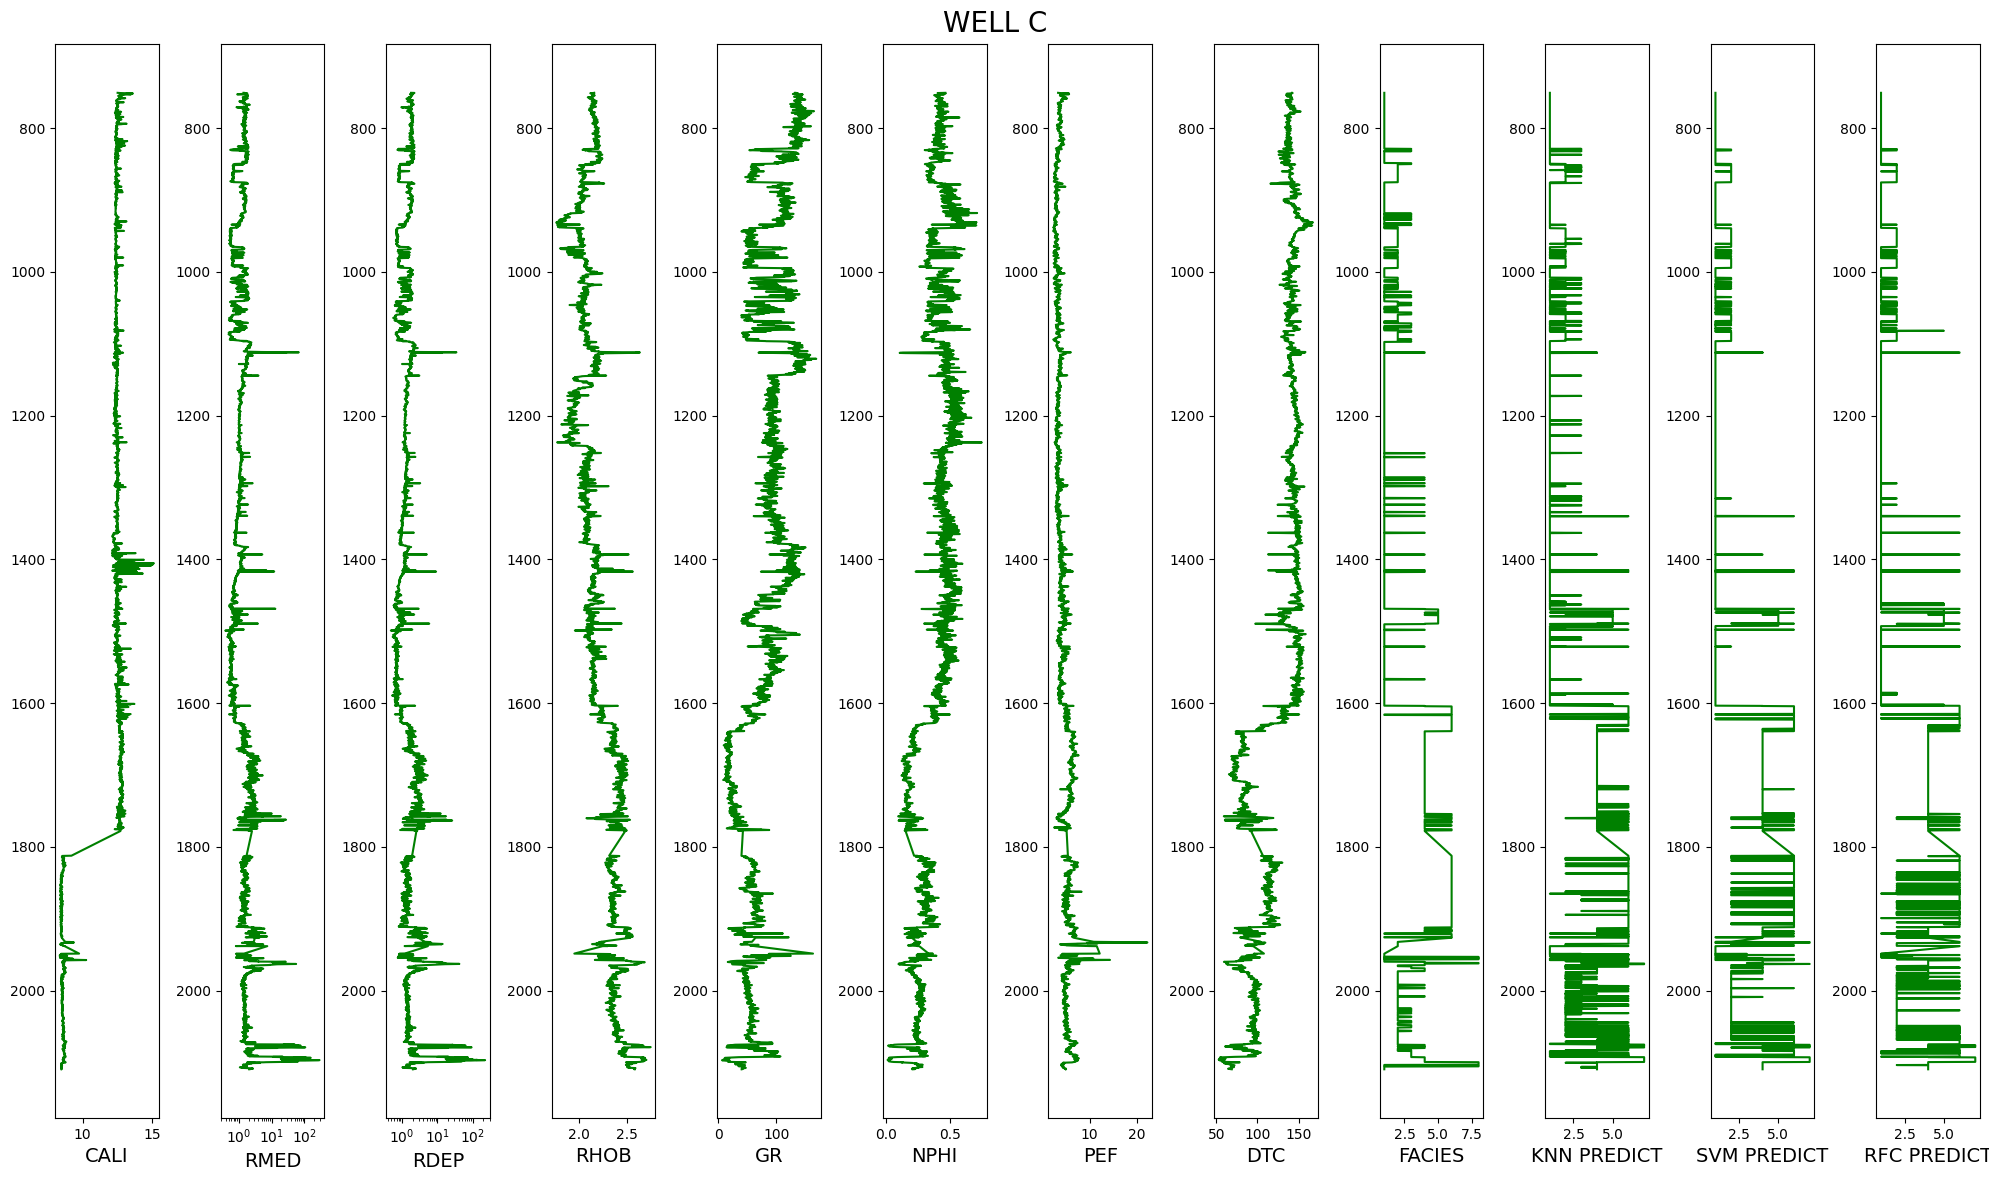

In [79]:
figure, ax = plt.subplots(nrows=1, ncols=12, figsize=(20, 12))
logs = blind_dataset2.sort_values(by='DEPTH_MD')
features = ['CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'FACIES',
            'KNN PREDICT', 'SVM PREDICT', 'RFC PREDICT']

for i in range(len(features)):
    if features[i] in ['RMED', 'RDEP']:
        ax[i].semilogx(logs[features[i]], logs.DEPTH_MD, '-g')
    else:
        ax[i].plot(logs[features[i]], logs.DEPTH_MD, '-g')
    ax[i].invert_yaxis()
    ax[i].set_xlabel(features[i], fontsize=14)

figure.suptitle('WELL C', fontsize=20)
plt.tight_layout()
plt.show()

# Model Clustering

## K-Means Clustering

In [80]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pylab as pl
%matplotlib inline

In [85]:
dataABC

DEPTH_MD       CALI      RMED      RDEP      RHOB          GR  \
130     754.179199  12.521476  1.412026  1.315972  2.079341  115.562035   
131     754.331200  12.630612  1.398117  1.315344  2.077192  113.619270   
132     754.483199  12.726549  1.394453  1.323453  2.076251  116.701439   
133     754.635199  12.860774  1.415387  1.336856  2.078405  118.532913   
134     754.787200  12.904781  1.389204  1.309308  2.079669  119.113991   
...            ...        ...       ...       ...       ...         ...   
29770  2108.810799   8.489223  2.515090  2.351785  2.578479   41.485081   
29771  2108.962799   8.495117  2.285108  2.113054  2.577482   40.776936   
29772  2109.114799   8.501101  2.294918  2.168718  2.576595   41.308838   
29773  2109.266799   8.487657  2.214566  2.173669  2.582330   41.449379   
29774  2109.418799   8.468590  2.096360  2.026962  2.584394   40.251076   

           NPHI       PEF         DTC  
130    0.495291  5.906584  143.338440  
131    0.501820  6.384551  143.411118  
132    0.522005  7.069182  143.314133  
133    0.546147  7.836967  143.667496  
134    0.558983  7.969746  145.145447  
...         ...       ...         ...  
29770  0.217340  4.738206   65.315865  
29771  0.228533  4.893716   65.888664  
29772  0.224942  4.922005   66.780136  
29773  0.220939  4.987738   67.610382  
29774  0.208230  4.941102   68.807716  

[28510 rows x 9 columns]

In [84]:
clustering_data = dataABC.drop(['FACIES', 'WELL_NAME'], axis=1, inplace=True)

KeyError: "['FACIES', 'WELL_NAME'] not found in axis"

In [87]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
clustering_data_scaled = scaler2.fit(clustering_data)
clustering_data_scaled = scaler2.transform(clustering_data)
clustering_data_scaled

array([[-1.65082911e+00,  4.70576045e-01, -4.50826608e-02, ...,
         9.76852206e-01,  1.44610154e+00,  7.14299338e-01],
       [-1.65047879e+00,  5.40557182e-01, -4.59908763e-02, ...,
         1.02982483e+00,  1.84104136e+00,  7.17007669e-01],
       [-1.65012847e+00,  6.02074273e-01, -4.62301609e-02, ...,
         1.19358859e+00,  2.40674631e+00,  7.13393532e-01],
       ...,
       [ 1.47193213e+00, -2.10738969e+00,  1.25686016e-02, ...,
        -1.21660576e+00,  6.32552770e-01, -2.13864158e+00],
       [ 1.47228245e+00, -2.11601090e+00,  7.32174313e-03, ...,
        -1.24909038e+00,  6.86866948e-01, -2.10770251e+00],
       [ 1.47263277e+00, -2.12823702e+00, -3.96862568e-04, ...,
        -1.35220283e+00,  6.48331938e-01, -2.06308391e+00]])

In [88]:
km = KMeans(n_clusters=5, init='k-means++', n_init=100, max_iter=1000)
km.fit(clustering_data_scaled)

KMeans(max_iter=1000, n_clusters=5, n_init=100)

In [89]:
km.labels_

array([0, 0, 0, ..., 3, 3, 3])

In [90]:
km.inertia_

77390.82550933534

In [91]:
pd.DataFrame(km.cluster_centers_)

0         1          2          3         4         5         6  \
0 -0.491810  0.449237  -0.069291  -0.072731 -0.575007  0.658601  0.754730   
1  0.796755  0.579381  -0.000831  -0.008810  1.128102 -1.384358 -1.284746   
2  1.340490 -1.799013  47.388779  43.005639  2.850658 -1.440595 -2.952570   
3  1.383265 -2.032950   0.171929   0.197575  1.180391 -0.355837 -0.975838   
4 -1.114163  0.397631  -0.084887  -0.087308 -0.800626 -0.803150 -0.330805   

          7         8  
0 -0.264339  0.664838  
1  1.212822 -1.309972  
2  0.705661 -2.391709  
3  0.266171 -1.188269  
4 -0.943154  0.602164

In [93]:
pd.DataFrame(scaler2.inverse_transform(pd.DataFrame(km.cluster_centers_)),
            columns=clustering_data.columns)

DEPTH_MD       CALI        RMED        RDEP      RHOB          GR  \
0  1257.066213  12.488197    1.041287    1.092896  2.097092  103.780540   
1  1816.161906  12.691158    2.089711    2.139067  2.392902   32.007460   
2  2052.083374   8.982019  727.831516  706.148221  2.692090   30.031739   
3  2070.642989   8.617190    4.735422    5.516940  2.401984   68.141398   
4   987.033492  12.407717    0.802444    0.854316  2.057905   52.426434   

       NPHI       PEF         DTC  
0  0.467914  3.836562  142.011149  
1  0.216544  5.624262   89.017377  
2  0.010981  5.010483   59.989110  
3  0.254618  4.478600   92.283258  
4  0.334120  3.015043  140.329315

### Output Target 1 : Elbow Method

Text(0.5, 1.0, 'The Elbow Method Showing the Optimal k')

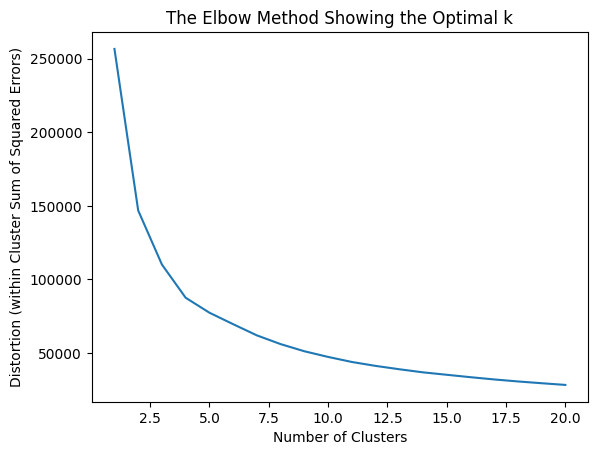

In [94]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,21):
  km = KMeans(n_clusters=i,random_state=1000,
  init='k-means++',  n_init=1000,  max_iter=500)
  km.ﬁt(clustering_data_scaled)
  distortions.append(km.inertia_)

plt.plot(range(1,21),distortions)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method Showing the Optimal k')

### Output Target 2 : Average Silhouette Score at Various Number of Cluster

c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mabdu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Text(0.5, 1.0, 'Silhoutte Analysis  Showing  the  Optimal  k')

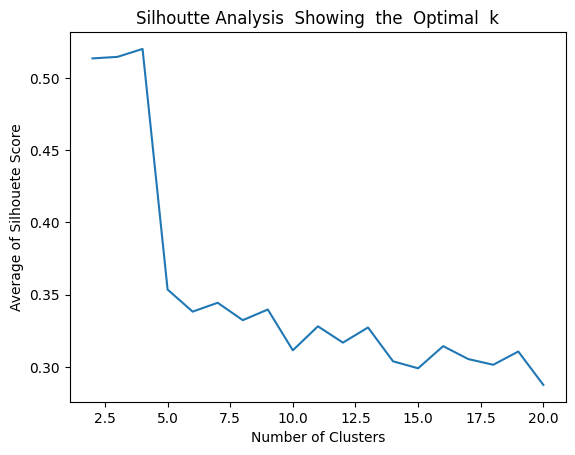

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_avg = []
for i in range_n_clusters:
  km = KMeans(n_clusters=i)
  km.fit(clustering_data_scaled)
  cluster_labels = km.labels_
  silhouette_avg.append(silhouette_score(clustering_data_scaled, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Number of Clusters')
plt.ylabel('Average of Silhouete Score')
plt.title('Silhoutte Analysis  Showing  the  Optimal  k')

### Output Target 3 : Box-Whisker Plot of Each Cluster

In [96]:
clustering_data_scaled2 = pd.DataFrame((clustering_data_scaled),
                                       columns=clustering_data.columns)
clustering_data_scaled2['CLUSTER']=km.labels_
clustering_data_scaled2

DEPTH_MD      CALI      RMED      RDEP      RHOB        GR      NPHI  \
0     -1.650829  0.470576 -0.045083 -0.059101 -0.677204  0.993951  0.976852   
1     -1.650479  0.540557 -0.045991 -0.059139 -0.689578  0.938652  1.029825   
2     -1.650128  0.602074 -0.046230 -0.058644 -0.694998  1.026383  1.193589   
3     -1.649778  0.688143 -0.044863 -0.057825 -0.682595  1.078514  1.389469   
4     -1.649428  0.716361 -0.046573 -0.059508 -0.675315  1.095054  1.493610   
...         ...       ...       ...       ...       ...       ...       ...   
28505  1.471231 -2.115006  0.026945  0.004187  2.196547 -1.114586 -1.278286   
28506  1.471582 -2.111227  0.011928 -0.010400  2.190804 -1.134743 -1.187473   
28507  1.471932 -2.107390  0.012569 -0.006999  2.185699 -1.119602 -1.216606   
28508  1.472282 -2.116011  0.007322 -0.006696  2.218716 -1.115602 -1.249090   
28509  1.472633 -2.128237 -0.000397 -0.015660  2.230601 -1.149711 -1.352203   

            PEF       DTC  CLUSTER  
0      1.446102  0.714299        9  
1      1.841041  0.717008        9  
2      2.406746  0.713394        9  
3      3.041160  0.726562        1  
4      3.150875  0.781637        1  
...         ...       ...      ...  
28505  0.480681 -2.193208       11  
28506  0.609178 -2.171862       11  
28507  0.632553 -2.138642       11  
28508  0.686867 -2.107703       11  
28509  0.648332 -2.063084       11  

[28510 rows x 10 columns]

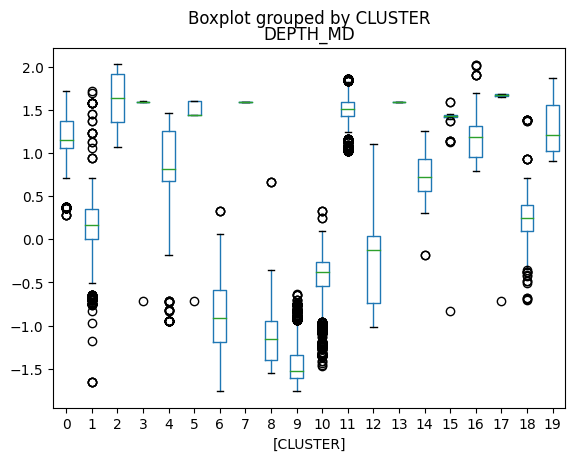

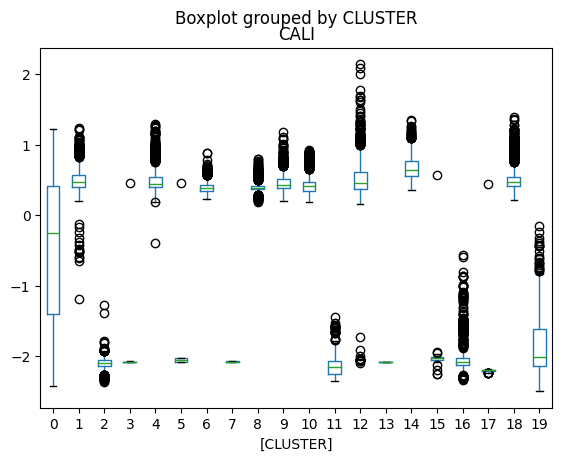

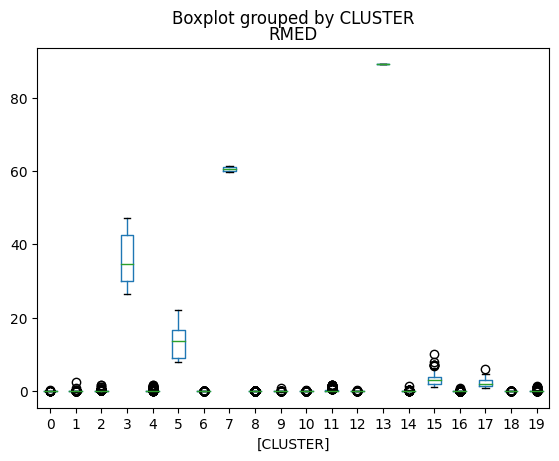

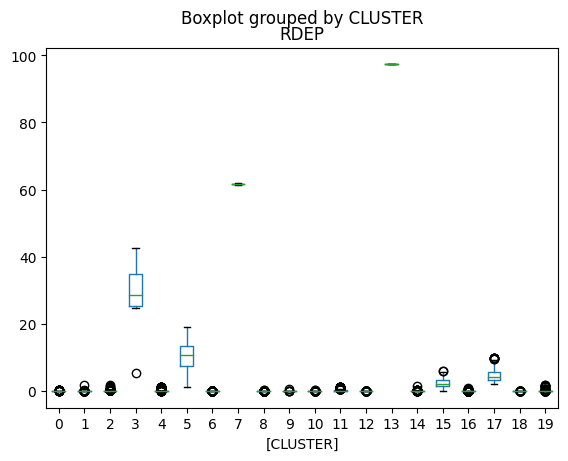

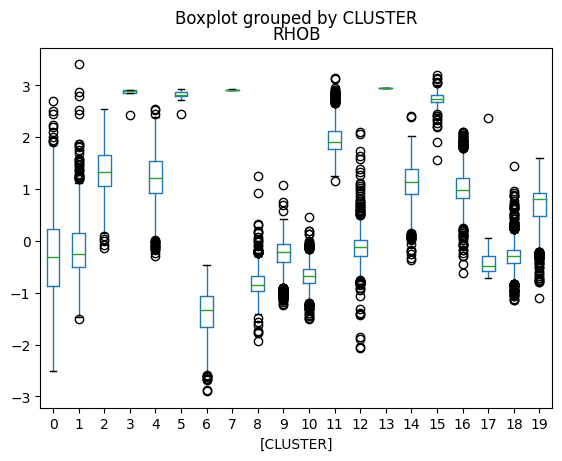

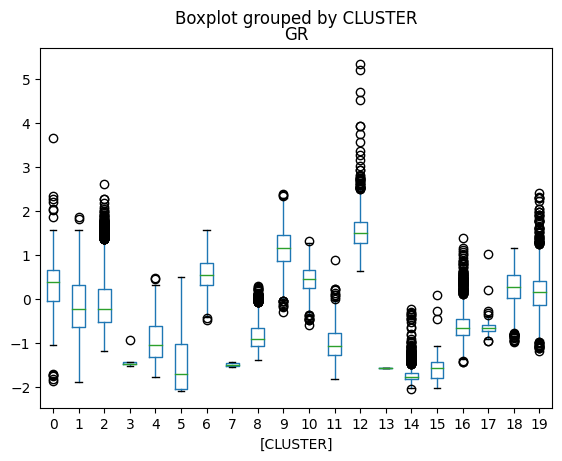

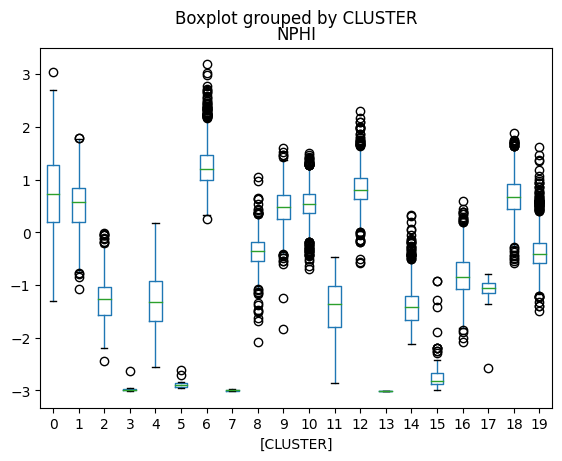

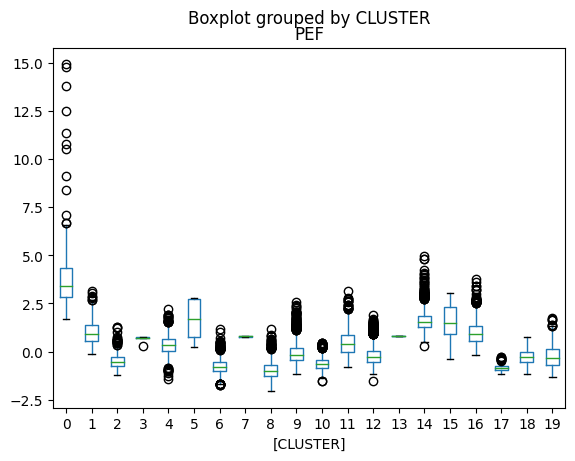

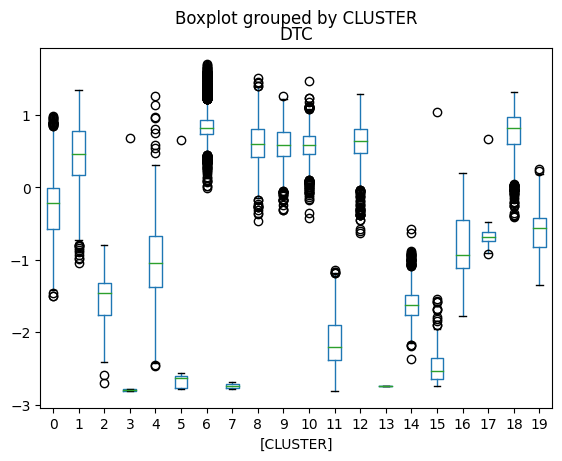

In [97]:
for i in range((len(clustering_data_scaled2.columns)-1)):
  clustering_data_scaled2.boxplot(column=[clustering_data_scaled2.columns[i]],
                                  by=['CLUSTER'], grid=False)

### Output Target 4 : Pair Plot per Cluster

In [98]:
clustering_data_scaled2.head()

DEPTH_MD      CALI      RMED      RDEP      RHOB        GR      NPHI  \
0 -1.650829  0.470576 -0.045083 -0.059101 -0.677204  0.993951  0.976852   
1 -1.650479  0.540557 -0.045991 -0.059139 -0.689578  0.938652  1.029825   
2 -1.650128  0.602074 -0.046230 -0.058644 -0.694998  1.026383  1.193589   
3 -1.649778  0.688143 -0.044863 -0.057825 -0.682595  1.078514  1.389469   
4 -1.649428  0.716361 -0.046573 -0.059508 -0.675315  1.095054  1.493610   

        PEF       DTC  CLUSTER  
0  1.446102  0.714299        9  
1  1.841041  0.717008        9  
2  2.406746  0.713394        9  
3  3.041160  0.726562        1  
4  3.150875  0.781637        1

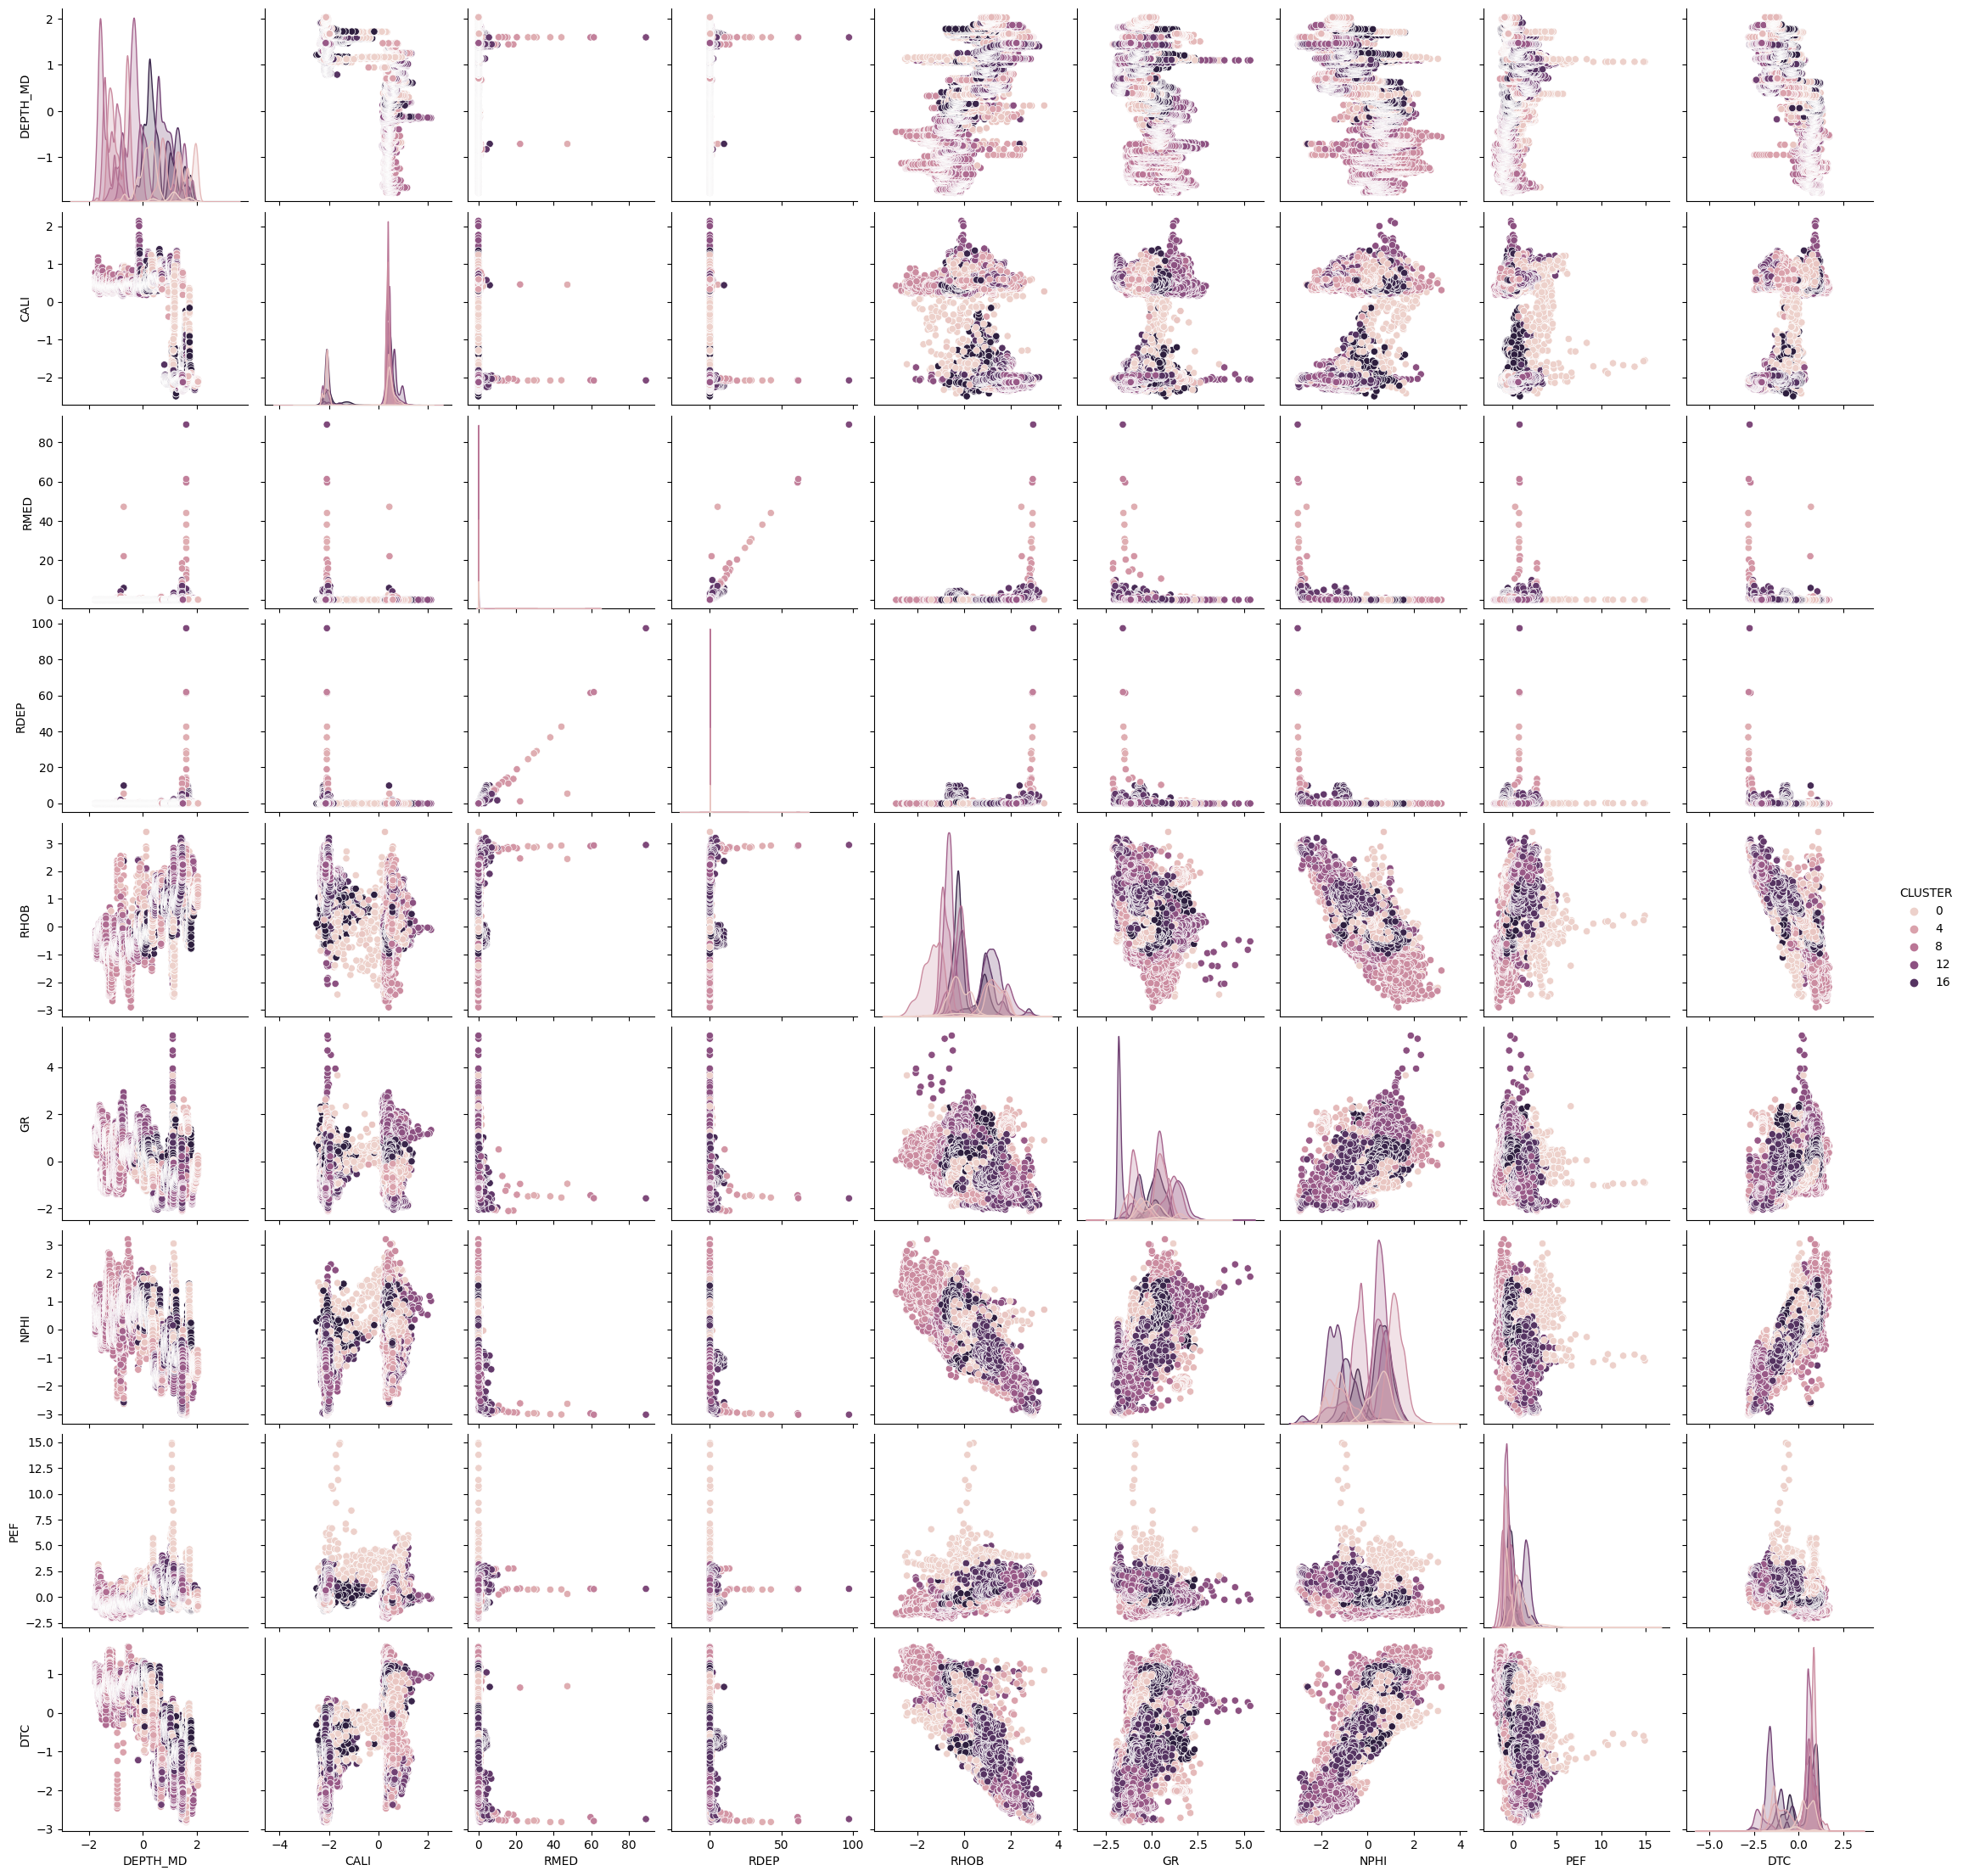

In [99]:
Group_by=clustering_data_scaled2.groupby(by='CLUSTER').mean()
clustering_data_scaled2.groupby(by='CLUSTER').count()

sns.pairplot(clustering_data_scaled2, hue="CLUSTER")

In [100]:
clustering_data_scaled2.groupby(by='CLUSTER').count()

DEPTH_MD  CALI  RMED  RDEP  RHOB    GR  NPHI   PEF   DTC
CLUSTER                                                          
0             258   258   258   258   258   258   258   258   258
1            1670  1670  1670  1670  1670  1670  1670  1670  1670
2            1353  1353  1353  1353  1353  1353  1353  1353  1353
3               6     6     6     6     6     6     6     6     6
4            1633  1633  1633  1633  1633  1633  1633  1633  1633
5              12    12    12    12    12    12    12    12    12
6            3249  3249  3249  3249  3249  3249  3249  3249  3249
7               2     2     2     2     2     2     2     2     2
8            2621  2621  2621  2621  2621  2621  2621  2621  2621
9            2653  2653  2653  2653  2653  2653  2653  2653  2653
10           3706  3706  3706  3706  3706  3706  3706  3706  3706
11            818   818   818   818   818   818   818   818   818
12           2067  2067  2067  2067  2067  2067  2067  2067  2067
13              1     1     1     1     1     1     1     1     1
14           2606  2606  2606  2606  2606  2606  2606  2606  2606
15            116   116   116   116   116   116   116   116   116
16           1713  1713  1713  1713  1713  1713  1713  1713  1713
17            127   127   127   127   127   127   127   127   127
18           2752  2752  2752  2752  2752  2752  2752  2752  2752
19           1147  1147  1147  1147  1147  1147  1147  1147  1147